In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("HepatitisCdata.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [5]:
df['Category'].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

## Print the data types

In [6]:
df.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [7]:
df.shape

(615, 14)

# Applied Data Preprocessing Techniques:
- Handling Missing Values
- Label Encoding
- Scaling Transformation

## Handling Missing Values

In [8]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [9]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df = df.drop('Unnamed: 0', axis=1)

print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


C:\Users\DCL\AppData\Local\Temp\ipykernel_10856\601573477.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ALB'].fillna(df['ALB'].mean(), inplace=True)
C:\Users\DCL\AppData\Local\Temp\ipykernel_10856\601573477.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [10]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

C:\Users\DCL\AppData\Local\Temp\ipykernel_10856\3193369793.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})


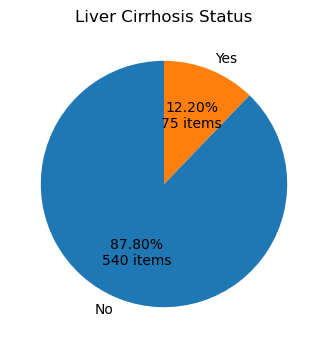

In [11]:
# Defining a function to plot a simple pie chart
def plotPie(value, title, label):
    plt.figure(figsize=(4,4))
    plt.pie(
        value.value_counts(),
        startangle=90,
        labels = label,
        autopct=(lambda p:f'{p:.2f}%\n{p*sum(value.value_counts())/100 :.0f} items')
    )
    plt.title(title)
    plt.show()

plotPie(df["Category"], "Liver Cirrhosis Status", ["No", "Yes"])

In [12]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Label Encoder

In [13]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.sample(5)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
334,0,7,0,85,256,53,17,12,169,238,40,97,93
321,0,6,0,115,198,30,32,38,132,74,47,236,141
168,0,21,1,158,148,293,162,52,368,175,78,311,110
123,0,17,1,73,167,304,169,52,387,301,33,341,136
319,0,6,0,151,107,109,25,27,327,158,32,126,102


# Scaling Transformation

In [14]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.sample(10)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
475,0.0,0.562500,0.0,0.423280,0.789855,0.419355,0.239865,0.278075,0.527094,0.447284,0.387931,0.845938,0.636364
563,1.0,0.729167,0.0,0.899471,0.043478,0.524927,0.935811,0.812834,0.706897,0.300319,0.250000,0.960784,0.989899
334,0.0,0.145833,0.0,0.449735,0.618357,0.155425,0.057432,0.064171,0.416256,0.760383,0.344828,0.271709,0.469697
125,0.0,0.354167,1.0,0.571429,0.676329,0.897361,0.584459,0.497326,0.729064,0.996805,0.431034,0.361345,0.550505
199,0.0,0.500000,1.0,0.222222,0.234300,0.498534,0.466216,0.245989,0.384236,0.610224,0.344828,0.767507,0.424242
0,0.0,0.125000,1.0,0.338624,0.258454,0.067449,0.239865,0.299465,0.290640,0.038339,0.836207,0.103641,0.348485
116,0.0,0.333333,1.0,0.740741,0.333333,0.686217,0.266892,0.631016,0.901478,0.980831,0.560345,0.792717,0.782828
559,1.0,0.666667,1.0,0.582011,0.910628,0.149560,0.844595,0.577540,0.165025,0.709265,0.956897,0.997199,0.196970
607,1.0,0.541667,0.0,0.365079,0.062802,0.005865,0.506757,0.802139,0.206897,0.095847,0.965517,0.938375,0.969697
574,1.0,0.687500,1.0,0.634921,0.045894,0.082111,0.871622,0.219251,0.699507,0.255591,0.293103,0.887955,0.383838


In [15]:
np.abs(df.iloc[:,:-1].corrwith(df['Category'])).sort_values(ascending = False)

Category    1.000000
AST         0.597019
GGT         0.447204
BIL         0.433570
CHOL        0.274088
ALP         0.167298
CHE         0.166639
ALB         0.163214
CREA        0.104584
ALT         0.083090
Sex         0.071663
Age         0.044767
dtype: float64

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix

## Test Train Split 20:80

In [ ]:
predictors = df.drop(['Category'], axis= 1)
target = df['Category']
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0, stratify=target)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(492, 12) (492,)
(123, 12) (123,)


In [ ]:
classifiers_description = {"model":[],"precision":[], "recall":[],"f1-score":[], "accuracy":[], "standard_deviation" :[]}

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from numpy import mean
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Helper Function

In [ ]:
def model_accuracy(classifier = None, predictors=None, target= None, n_splits = 20):
    start_time = datetime.now()
    global classifiers_description
    # helper function for Model Evaluation

    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    y_pred = cross_val_predict(classifier, predictors, target, cv=kf)
    scores = cross_val_score(classifier, predictors, target, cv=kf)

    #confusion matrix

    cf_matrix = confusion_matrix(target, y_pred)
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    sns.heatmap(cf_matrix,annot=True, ax=ax, fmt='g', cmap='Blues')

    #classifier description report
    report = classification_report(target, y_pred, output_dict=True)
    classifier_name = type(classifier).__name__
    if classifier_name not in classifiers_description["model"]:
        classifiers_description["model"].append(classifier_name)
        classifiers_description["precision"].append(report['weighted avg']["precision"])
        classifiers_description["recall"].append(report['weighted avg']["recall"])
        classifiers_description["f1-score"].append(report['weighted avg']["f1-score"])
        classifiers_description["accuracy"].append(scores.mean())
        classifiers_description["standard_deviation"].append(scores.std())


    print(classification_report(target, y_pred))
    # Plot the ROC-AUC Curve for model-1 :
    fpr, tpr, thresholds = roc_curve(target, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

    TP = cf_matrix[0][0]
    TN = cf_matrix[1][1]
    FP = cf_matrix[0][1]
    FN = cf_matrix[1][0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)

    print("Performance: \n")
    print("TPR=   ",mean(TPR)*100)
    print("TNR=   ",mean(TNR)*100)
    print("Pre=   ",mean(PPV)*100)
    print("FPR=   ",mean(FPR)*100)
    print("FNR=   ",mean(FNR)*100)
    print("\n")

    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))

    return (scores.mean(), scores.std())

# Adaboosting

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       432
         1.0       0.93      0.85      0.89        60

    accuracy                           0.97       492
   macro avg       0.95      0.92      0.94       492
weighted avg       0.97      0.97      0.97       492



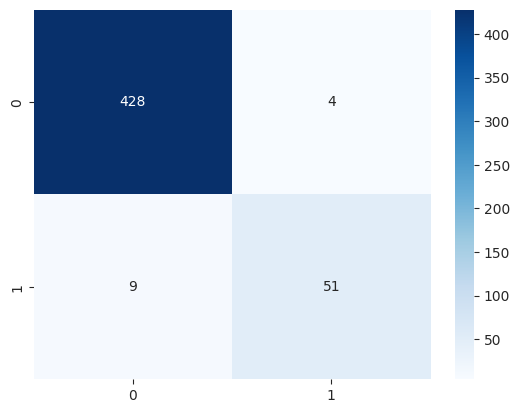

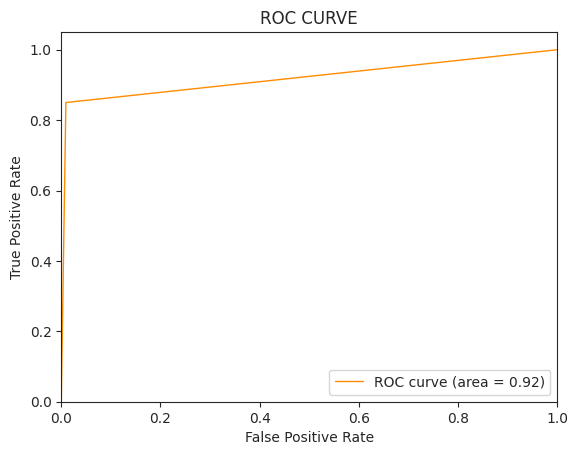

Performance: 

TPR=    97.94050343249427
TNR=    92.72727272727272
Pre=    99.07407407407408
FPR=    7.2727272727272725
FNR=    2.059496567505721


Duration: 0:00:03.943281


(0.9736326530612246, 0.02413912197027976)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier()
model_accuracy(classifier=AdaBoostClassifier(), predictors=x_train, target=y_train)

# Gaussian Naive Bayes

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       432
         1.0       0.78      0.77      0.77        60

    accuracy                           0.95       492
   macro avg       0.87      0.87      0.87       492
weighted avg       0.94      0.95      0.94       492



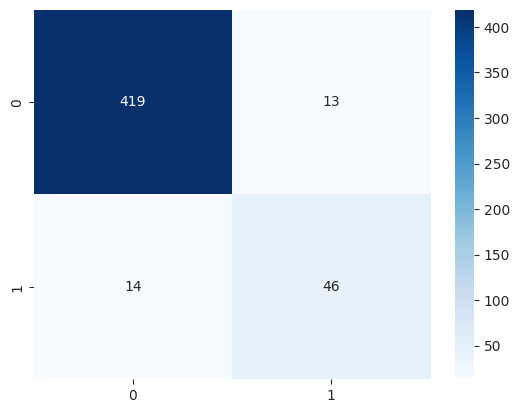

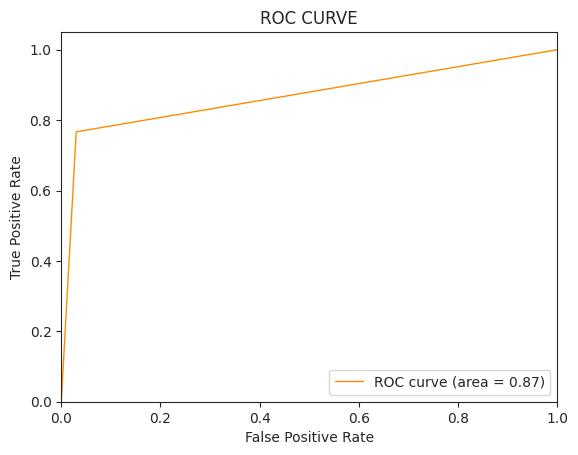

Performance: 

TPR=    96.76674364896074
TNR=    77.96610169491525
Pre=    96.99074074074075
FPR=    22.033898305084744
FNR=    3.233256351039261


Duration: 0:00:00.572987


(0.9451836734693877, 0.03864857849574515)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_GNB = GaussianNB()
model_accuracy(classifier=clf_GNB, predictors=x_train, target=y_train)

# RandomForestClassifier

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       432
         1.0       0.93      0.85      0.89        60

    accuracy                           0.97       492
   macro avg       0.95      0.92      0.94       492
weighted avg       0.97      0.97      0.97       492



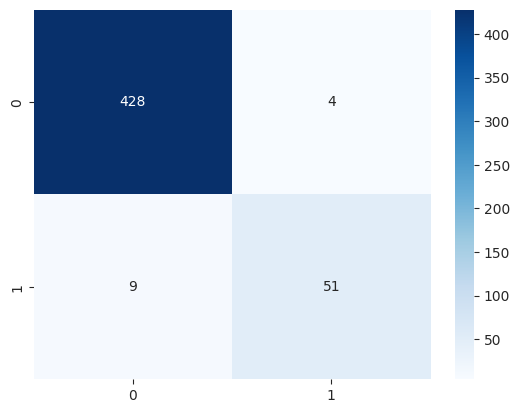

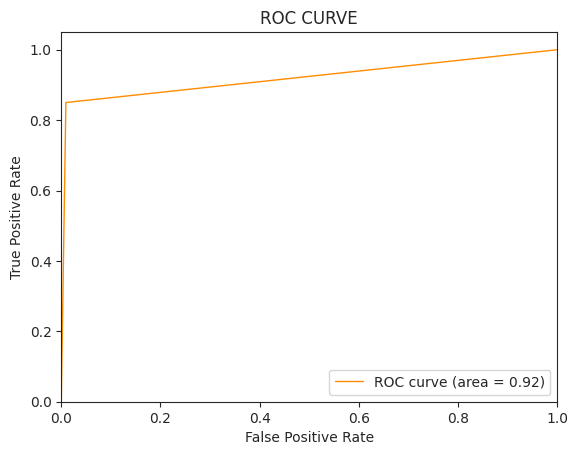

Performance: 

TPR=    97.94050343249427
TNR=    92.72727272727272
Pre=    99.07407407407408
FPR=    7.2727272727272725
FNR=    2.059496567505721


Duration: 0:00:05.093053


(0.9716734693877551, 0.024097677117977553)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier()
model_accuracy(classifier=clf_RF, predictors=x_train, target=y_train)

# Decision Tree

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       432
         1.0       0.83      0.80      0.81        60

    accuracy                           0.96       492
   macro avg       0.90      0.89      0.89       492
weighted avg       0.95      0.96      0.95       492



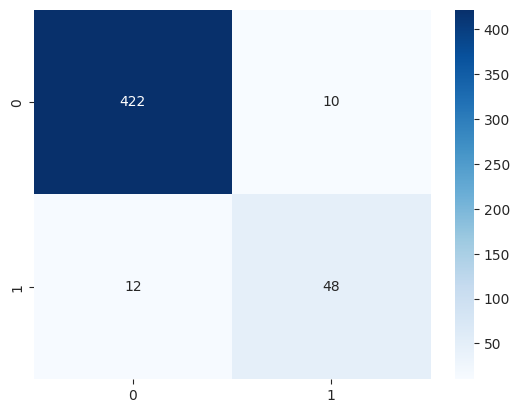

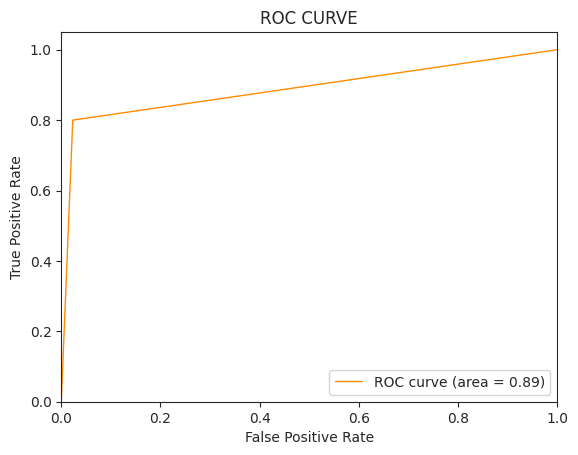

Performance: 

TPR=    97.23502304147466
TNR=    82.75862068965517
Pre=    97.68518518518519
FPR=    17.24137931034483
FNR=    2.7649769585253456


Duration: 0:00:00.582862


(0.95534693877551, 0.03617128026535674)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(max_depth=4,random_state=30)
model_accuracy(classifier=clf_DT, predictors=x_train, target=y_train)

# Support Vector Machine

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       432
         1.0       0.94      0.85      0.89        60

    accuracy                           0.98       492
   macro avg       0.96      0.92      0.94       492
weighted avg       0.98      0.98      0.98       492



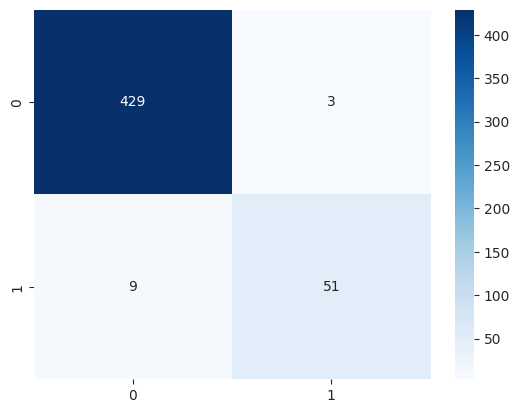

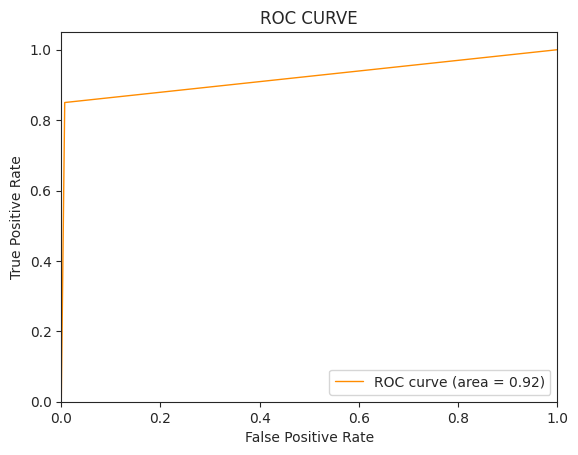

Performance: 

TPR=    97.94520547945206
TNR=    94.44444444444444
Pre=    99.30555555555556
FPR=    5.555555555555555
FNR=    2.054794520547945


Duration: 0:00:00.960859


(0.9756326530612245, 0.02853178007011093)

In [ ]:
from sklearn.svm import SVC
clf_svc = SVC(probability=True)
model_accuracy(classifier=clf_svc, predictors=x_train, target=y_train)

In [ ]:
classifier_df = pd.DataFrame.from_dict(classifiers_description)
classifier_df.sort_values(by=["f1-score","standard_deviation"], ascending=False)

,model,precision,recall,f1-score,accuracy,standard_deviation
4,SVC,0.975183,0.975610,0.975052,0.975633,0.028532
0,AdaBoostClassifier,0.973047,0.973577,0.973079,0.973633,0.024139
2,RandomForestClassifier,0.973047,0.973577,0.973079,0.971673,0.024098
3,DecisionTreeClassifier,0.954696,0.955285,0.954957,0.955347,0.036171
1,GaussianNB,0.944740,0.945122,0.944923,0.945184,0.038649


# ANN Architecture


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/HepatitisCdata.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,593,3=Cirrhosis,47,m,42.0,NaN,159.0,102.0,11.0,6.29,5.50,58.0,201.0,79.0
1,382,0=Blood Donor,43,f,41.2,38.2,18.6,20.5,9.3,6.15,5.44,64.0,9.7,70.9
2,18,0=Blood Donor,33,m,45.2,88.3,32.4,31.2,10.1,9.78,5.51,102.0,48.5,76.5
3,157,0=Blood Donor,46,m,45.9,80.1,67.5,36.7,2.9,8.73,4.68,113.0,50.1,68.8
4,414,0=Blood Donor,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9


In [ ]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [ ]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df = df.drop('Unnamed: 0', axis=1)

print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [ ]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.sample(5)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
35,0,38,1,77,213,122,97,39,159,295,17,54,40
358,0,18,0,87,238,92,60,16,149,81,78,31,25
465,0,20,0,169,79,44,30,92,106,28,97,26,132
199,0,8,1,53,23,116,135,19,19,122,76,1,86
152,0,14,1,78,92,72,55,32,92,120,41,136,108


In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.sample(10)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
126,0.0,0.375000,1.0,0.835979,0.932367,0.715543,0.726351,0.272727,0.381773,0.415335,0.258621,0.238095,0.782828
94,0.0,0.166667,0.0,0.444444,0.033816,0.577713,0.402027,0.208556,0.844828,0.281150,0.706897,0.434174,0.500000
588,0.0,0.166667,0.0,0.566138,0.463768,0.832845,0.503378,0.839572,0.894089,0.421725,0.465517,0.896359,0.353535
177,0.0,0.645833,0.0,0.597884,0.816425,0.378299,0.243243,0.262032,0.440887,0.380192,0.293103,0.266106,0.464646
245,1.0,0.270833,0.0,0.142857,0.987923,0.038123,0.638514,0.379679,0.041872,0.354633,0.991379,0.932773,0.055556
19,0.0,0.354167,1.0,0.365079,0.763285,0.381232,0.131757,0.085561,0.975369,0.993610,0.181034,0.344538,0.560606
335,0.0,0.562500,0.0,0.513228,0.157005,0.425220,0.337838,0.470588,0.145320,0.616613,0.931034,0.921569,0.292929
92,0.0,0.416667,0.0,0.809524,0.243961,0.337243,0.229730,0.235294,0.344828,0.456869,0.637931,0.302521,0.666667
509,0.0,0.187500,0.0,0.291005,0.543478,0.712610,0.334459,0.315508,0.943350,0.603834,0.637931,0.450980,0.449495
464,0.0,0.604167,1.0,0.412698,0.770531,0.302053,0.412162,0.326203,0.534483,0.948882,0.448276,0.134454,0.570707


In [ ]:
X = df.drop('Category', axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape, X_test.shape

((553, 12), (62, 12))

In [ ]:
model = Sequential([
    Flatten(input_shape=(12,)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

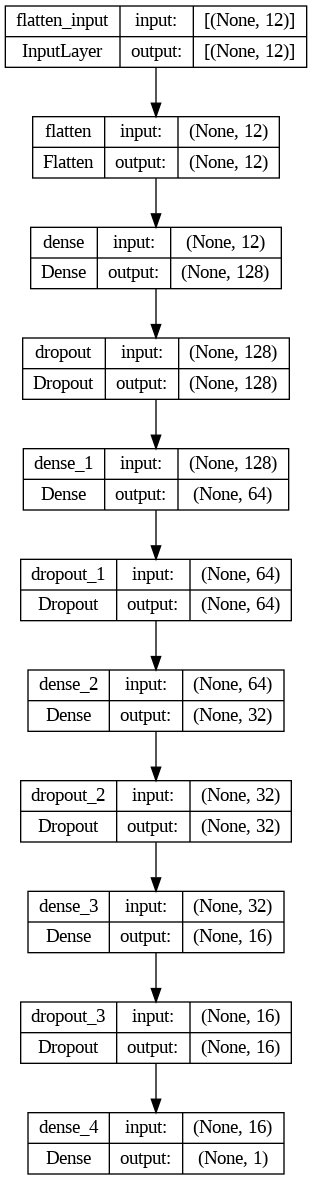

In [ ]:
from tensorflow.keras.utils import plot_model
#from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12)                0         
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

2/2 [==============================] - 0s 6ms/step
Model : ANN
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        50
         1.0       1.00      0.92      0.96        12

    accuracy                           0.98        62
   macro avg       0.99      0.96      0.97        62
weighted avg       0.98      0.98      0.98        62



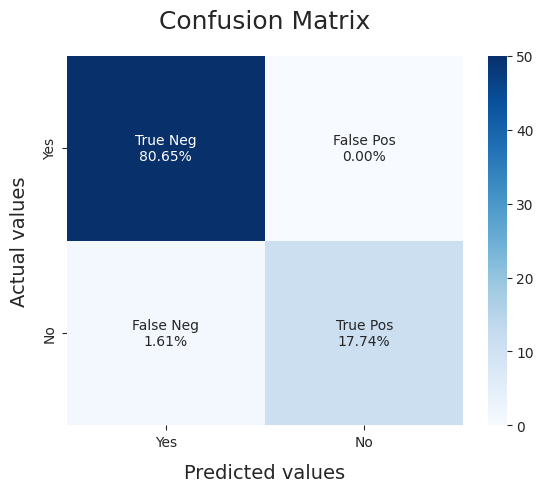

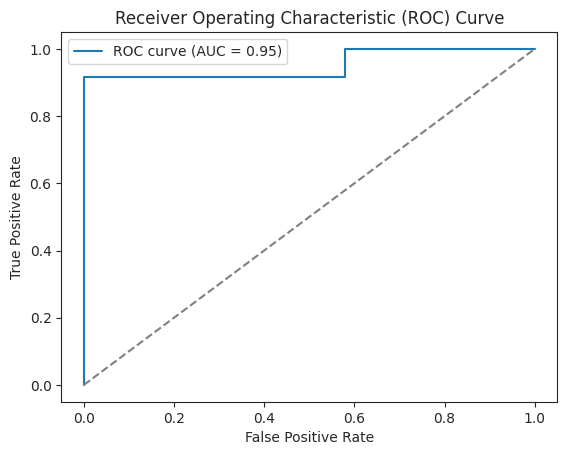

In [ ]:
history_ANN = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=0, shuffle=True)
probabilities = model.predict(X_test).flatten()
predictions = (probabilities > 0.5).astype(int)
loss = history_ANN.history['loss'][-1]
accuracy_ANN = history_ANN.history['accuracy'][-1]

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc_roc = roc_auc_score(y_test, probabilities)
fpr, tpr, thresholds = roc_curve(y_test, probabilities)


print("Model : ANN")
print(classification_report(y_test, predictions))
cf_matrix = confusion_matrix(y_test, predictions)
categories  = ['Yes','No']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

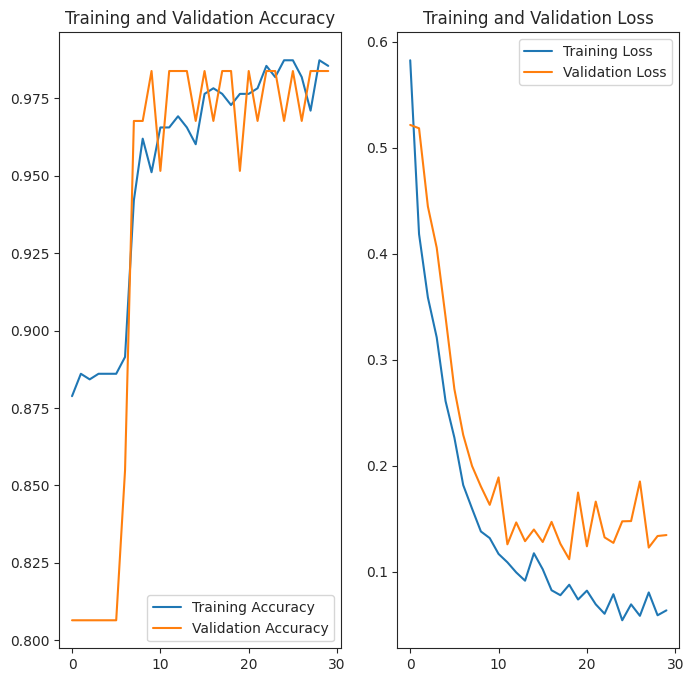

In [ ]:
acc_02 = history_ANN.history['accuracy']
val_acc_02 = history_ANN.history['val_accuracy']

loss_02 = history_ANN.history['loss']
val_loss_02 = history_ANN.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(30), acc_02, label='Training Accuracy')
plt.plot(range(30), val_acc_02, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss_02, label='Training Loss')
plt.plot(range(30), val_loss_02, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print("Accuracy of ANN: ",format(accuracy_ANN*100,".2f")+"%")

Accuracy of ANN:  98.55%


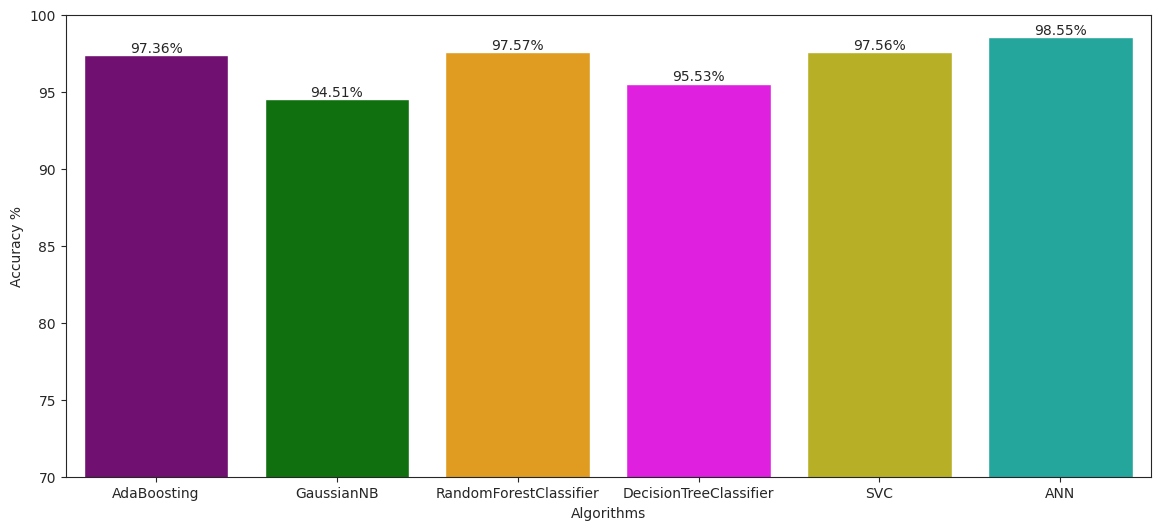

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE", "#87CEEB"]

df = pd.DataFrame(data=
{'Algorithms':['AdaBoosting','GaussianNB', 'RandomForestClassifier', 'DecisionTreeClassifier','SVC','ANN'],
'Accuracy %':[97.36, 94.51, 97.57 , 95.53, 97.56,accuracy_ANN*100]})

plt.figure(figsize=(14,6))

p = sns.barplot(x='Algorithms', y='Accuracy %',data=df, palette=colors)
p.set_ylim(70, 100)
for i in p.containers:
    labels = [f'{v.get_height():0.02f}%' for v in i]
    p.bar_label(i, labels=labels)